### △ X ○을 그림판에 여러 가지 이미지를 저장한 후 CNN으로 학습을 시켜 해당 데이터를 분류를 하는 모델을 만들어보자.

* train 데이터: 세모, 엑스, 동그라미 각각 80개씩 총 240개
* test 데이터: 세모, 엑스, 동그라미 각각 20개씩 총 60개

In [198]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [199]:
# 사용자의 경로에 맞춰서 변경할 것
train_path = '/content/drive/MyDrive/KDT/6. 머신러닝과 딥러닝/datasets/train'
test_path = '/content/drive/MyDrive/KDT/6. 머신러닝과 딥러닝/datasets/test'

# 이미지 28 x 28로 변환
# grayscale 적용
# 텐서 변환
# 정규화 적용
# 색 반전(배경 흰색 -> 검은색, 선 검은색 -> 흰색)
trans = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)),
    transforms.RandomInvert(1)
])

trainset = torchvision.datasets.ImageFolder(root= train_path, transform=trans)
testset = torchvision.datasets.ImageFolder(root= test_path, transform=trans)

In [200]:
# 정규화된 데이터 확인
print(trainset.__getitem__(18))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3922,
          0.7922, 0.9569, 1.0118, 0.9882, 0.0941, 0.0000

In [214]:
# 데이터 라벨링 이름 및 위치 확인
print(trainset.classes, testset.classes)

['circles', 'triangles', 'x'] ['circles', 'triangles', 'x']


In [215]:
# 이미지 라벨링 변환 딕셔너리
claess_map = {
    0: 'circles',
    1: 'triangles',
    2: 'x'
}

In [202]:
# 훈련 데이터 로드
loader = DataLoader(
    dataset=trainset,
    batch_size=64,
    shuffle=True,
)

imgs, labels = next(iter(loader))
print(imgs.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [204]:
# 데이터 형태 확인
imgs, labels = next(iter(loader))
print(imgs.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


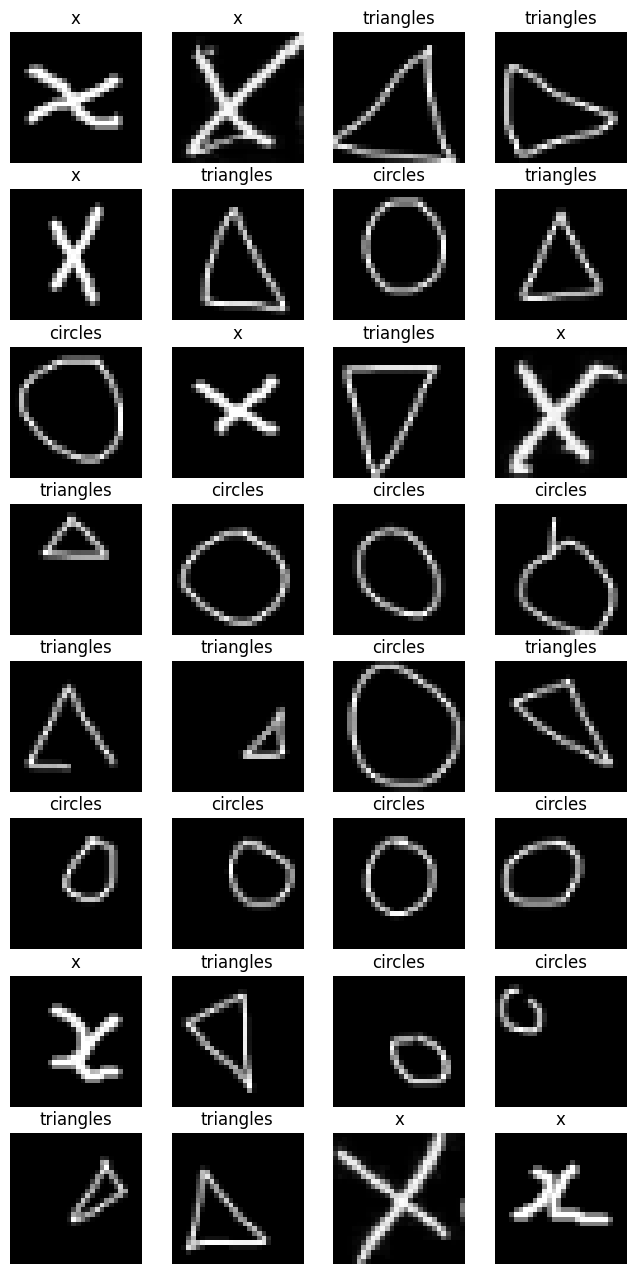

In [205]:
# 데이터 확인
imgs, labels = next(iter(loader))
fig, axes = plt.subplots(8, 4, figsize=(8, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(claess_map[label.item()])
    ax.axis('off')

In [206]:
# 장치 확인
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [207]:
# 컨볼루션 모델 설계
model = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=3, padding='same'),
    nn.ReLU(),

    nn.Conv2d(28, 28, kernel_size=3, padding='same'),
    nn.ReLU(),

    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(0.25),

    nn.Conv2d(28, 56, kernel_size=3, padding='same'),
    nn.ReLU(),

    nn.Conv2d(56, 56, kernel_size=3, padding='same'),
    nn.ReLU(),

    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(0.25),

    nn.Flatten(),

    nn.Linear(56 * 7 * 7, 3),
).to(device)

print(model)

Sequential(
  (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Dropout(p=0.25, inplace=False)
  (6): Conv2d(28, 56, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (7): ReLU()
  (8): Conv2d(56, 56, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (9): ReLU()
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Dropout(p=0.25, inplace=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=2744, out_features=3, bias=True)
)


In [208]:
# 학습
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 50

for epoch in range(1, epochs+1):
    sum_losses = 0
    sum_accs = 0
    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)

        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    1/50 Loss: 1.095100 Accuracy: 34.77%
Epoch    2/50 Loss: 1.046089 Accuracy: 33.07%
Epoch    3/50 Loss: 0.886823 Accuracy: 45.18%
Epoch    4/50 Loss: 0.642296 Accuracy: 75.26%
Epoch    5/50 Loss: 0.404703 Accuracy: 82.55%
Epoch    6/50 Loss: 0.391825 Accuracy: 83.72%
Epoch    7/50 Loss: 0.358472 Accuracy: 81.90%
Epoch    8/50 Loss: 0.290230 Accuracy: 85.68%
Epoch    9/50 Loss: 0.268514 Accuracy: 89.71%
Epoch   10/50 Loss: 0.258387 Accuracy: 89.19%
Epoch   11/50 Loss: 0.284551 Accuracy: 89.84%
Epoch   12/50 Loss: 0.237376 Accuracy: 88.54%
Epoch   13/50 Loss: 0.173622 Accuracy: 93.88%
Epoch   14/50 Loss: 0.145481 Accuracy: 96.88%
Epoch   15/50 Loss: 0.139440 Accuracy: 94.79%
Epoch   16/50 Loss: 0.129222 Accuracy: 96.09%
Epoch   17/50 Loss: 0.129618 Accuracy: 94.14%
Epoch   18/50 Loss: 0.139440 Accuracy: 94.79%
Epoch   19/50 Loss: 0.122193 Accuracy: 95.31%
Epoch   20/50 Loss: 0.072685 Accuracy: 97.14%
Epoch   21/50 Loss: 0.080353 Accuracy: 97.27%
Epoch   22/50 Loss: 0.069050 Accur

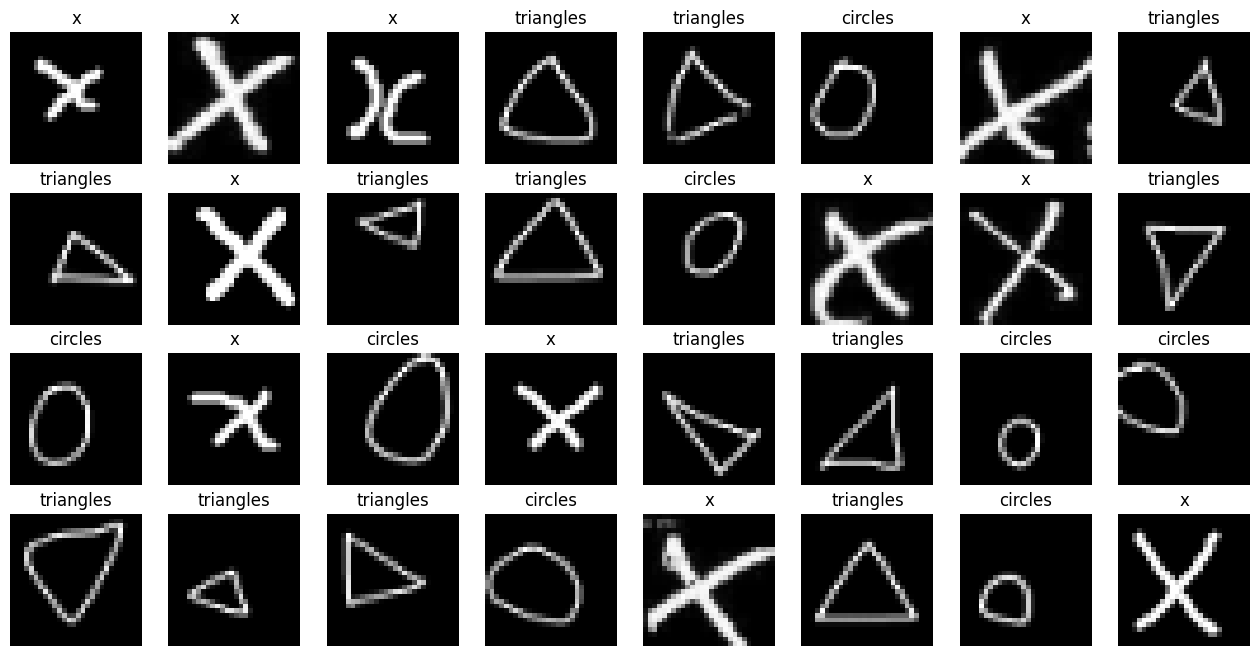

In [209]:
# 테스트 데이터 로드
test_loader = DataLoader(
    dataset=testset,
    batch_size=32,
    shuffle=True
)

imgs, labels = next(iter(test_loader))
fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(claess_map[label.item()])
    ax.axis('off')

In [210]:
# 평가
model.eval() # 모델을 테스트 모드로 전환 -> 그레디언트(학습) 중단

sum_accs = 0

# 정답 모음집
img_list = torch.Tensor()
y_pred_list = torch.Tensor()
y_true_list = torch.Tensor()

for x_batch, y_batch in test_loader:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)
  y_pred = model(x_batch)
  y_prob = nn.Softmax(1)(y_pred)
  y_pred_index = torch.argmax(y_prob, axis=1)

  y_pred_list = torch.cat((y_pred_list, y_pred_index), dim=0)
  y_true_list = torch.cat((y_true_list, y_batch), dim=0)
  img_list = torch.cat((img_list, x_batch), dim=0)

  acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
  sum_accs += acc

avg_acc = sum_accs / len(test_loader)
print(f'테스트 정확도는 {avg_acc:.2f}% 입니다.')

테스트 정확도는 95.09% 입니다.


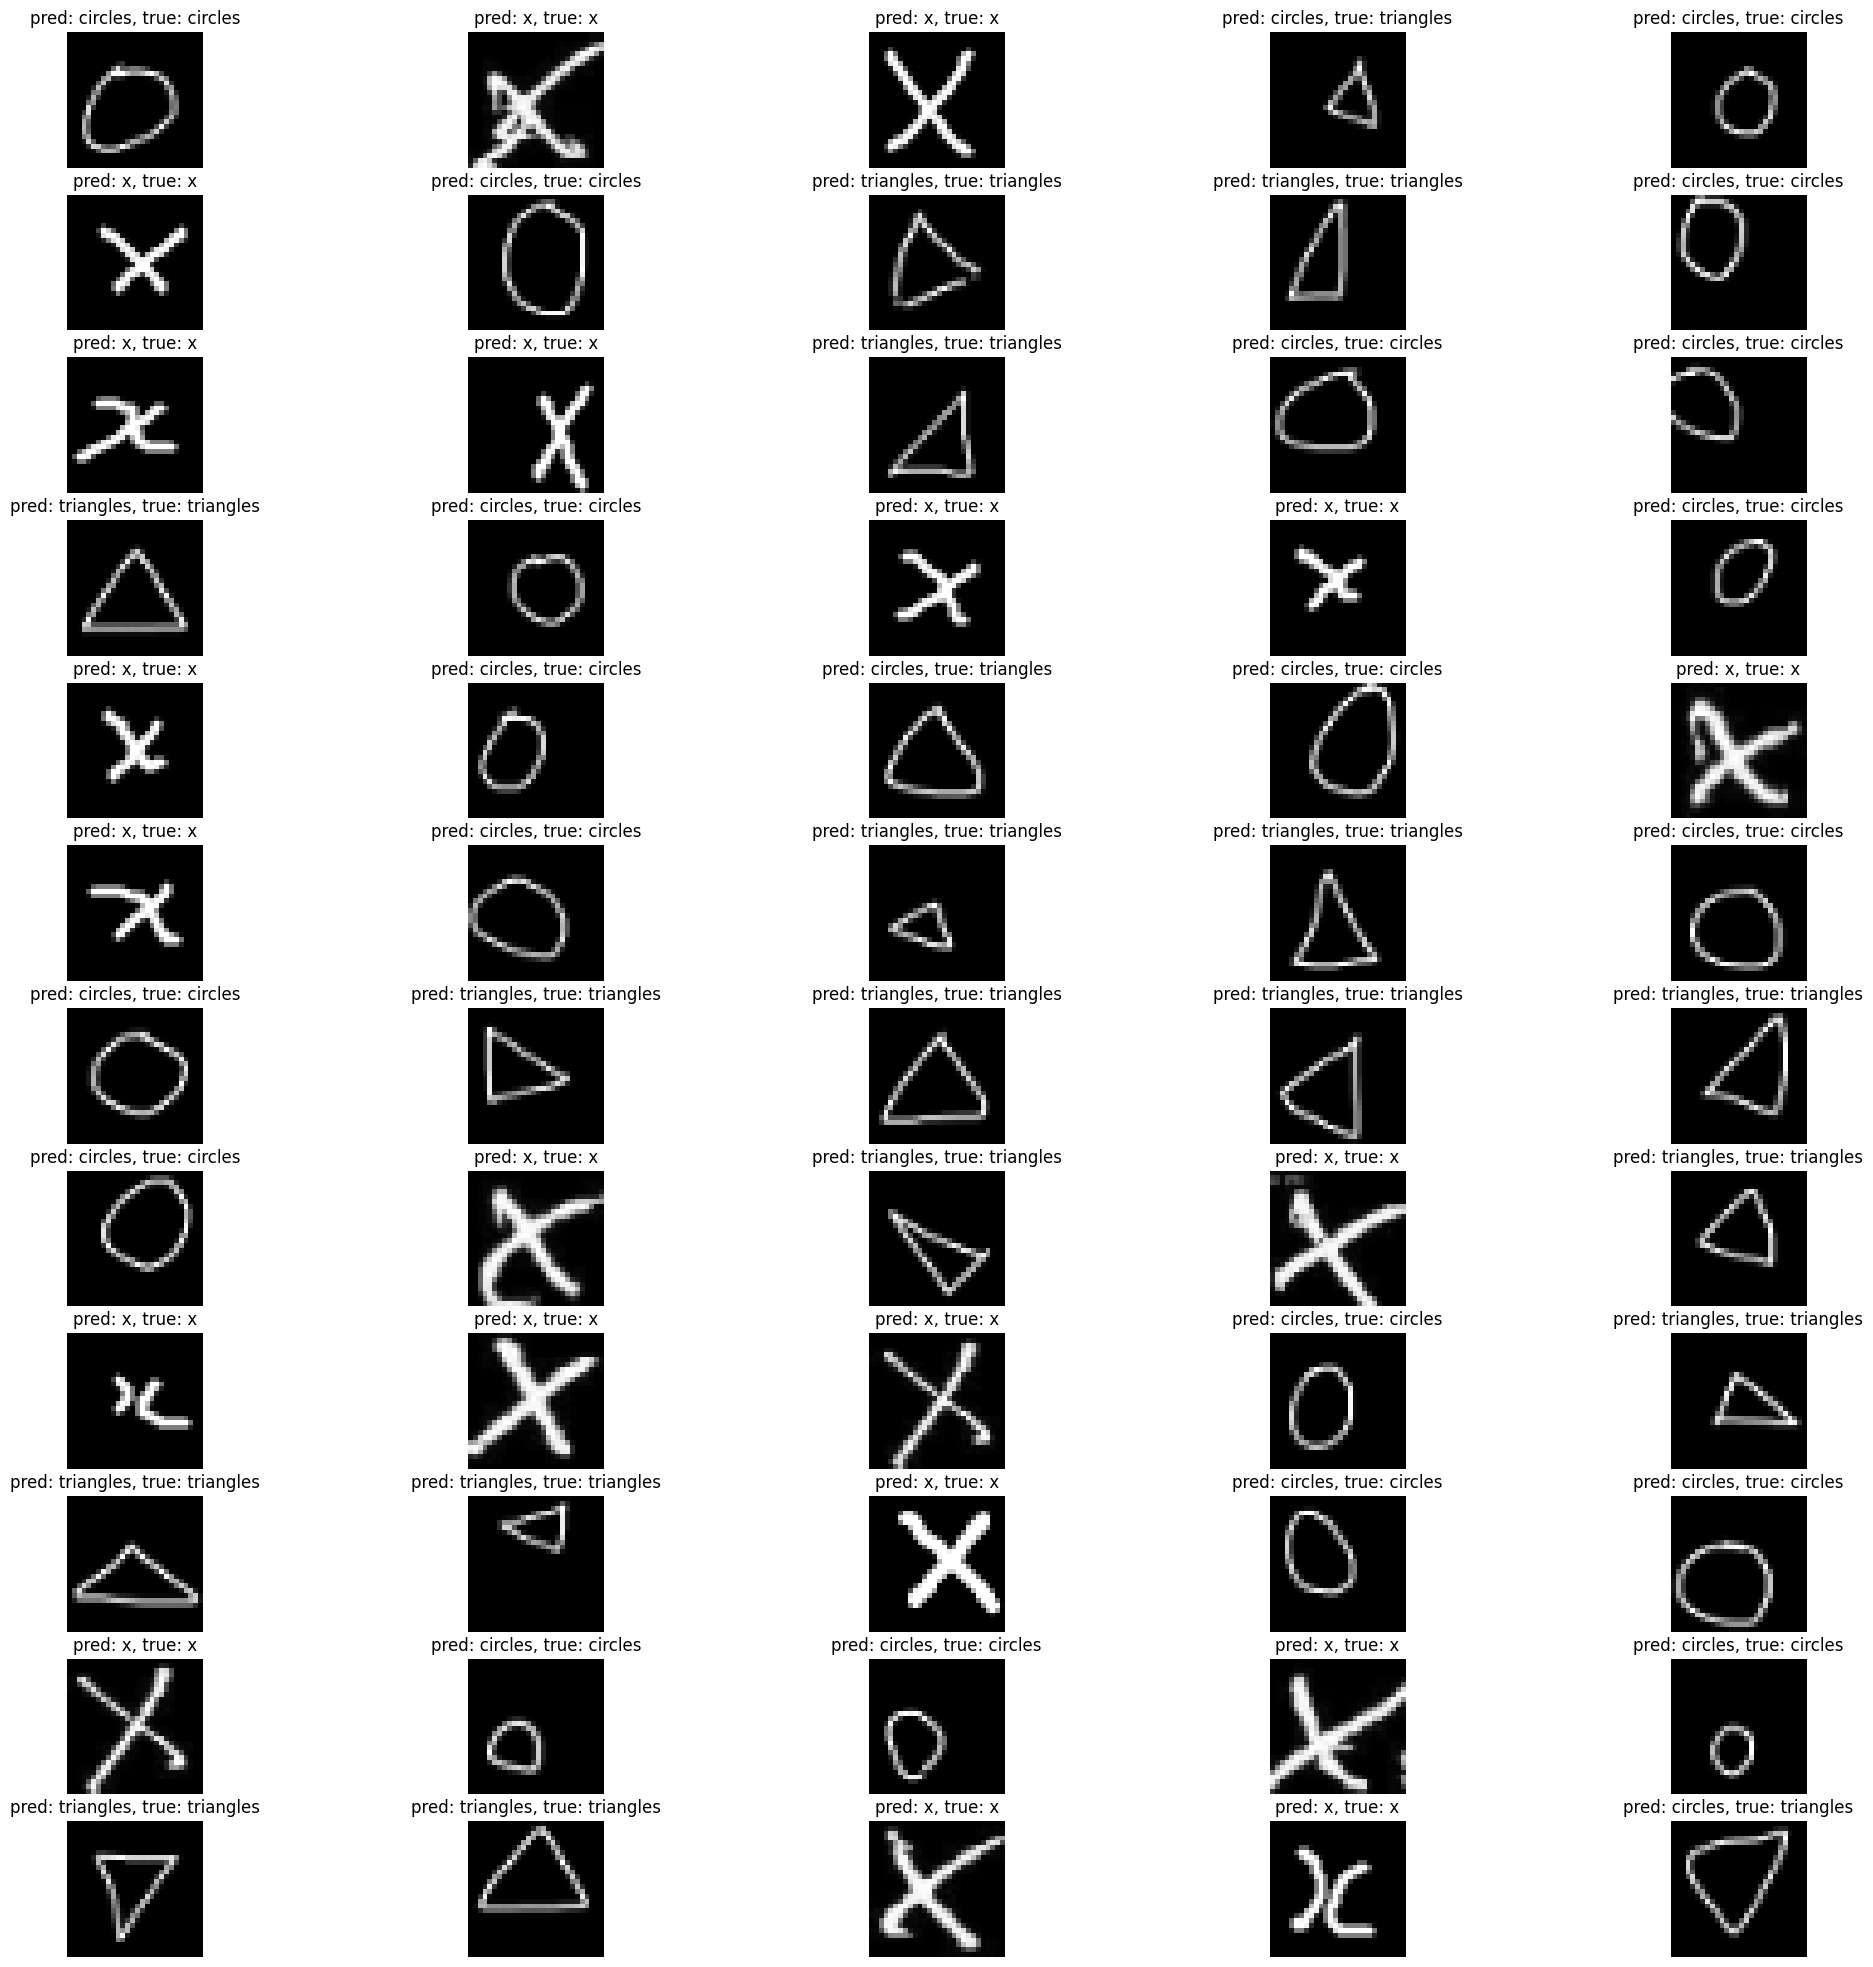

In [212]:
# 최종 결과 비교하기
fig, axes = plt.subplots(12, 5, figsize=(25, 25))

for ax, img, y_pred, y_true in zip(axes.flatten(), img_list, y_pred_list, y_true_list):
  ax.imshow(img.reshape(28, 28), cmap='gray')
  ax.set_title(f'pred: {claess_map[y_pred.item()]}, true: {claess_map[y_true.item()]}')
  ax.axis('off')